# Bayesian Inference Examples

This notebook will contain some examples of Bayesian inference, that not only focuses on theoritcal understanding of calculating the posterior through closed-form methods, but also deals with estimating the posterior with naive, and some more advanced algorithms.

In [18]:
# copied over
from __future__ import division
import os
import sys
import glob
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats as st
import scipy

%matplotlib inline
plt.style.use('ggplot')

from mpl_toolkits.mplot3d import Axes3D
import scipy.stats as stats
from functools import partial


## Example One: Simple Binomial and Beta (closed form/conjugate posterior)

In [19]:
'''
In this example we will be using the likelihood function for the binomial distribution to find
the true posterior distribution given our data.
'''
# Here is our given data
binomial_outcome = np.array([200,210]) # good, total

### Priors and likliehoods

1. Each observed example generated from a bernoulli distribution parameterized by theta
2. Therefore, our likelihood p(D|θ) can be modeled as a binomial distribution.
- This is because each samples has only two outcomes, and one probability for each outcome, which we can model multiple of with a binomial distribution.
- We can model the probability for a given binomial distribution with:

![Binom_fact](Qurry.png)
(in our case p is θ)

3. We assume to have no information about the probability distribution of p(D), so we model our prior p(θ) with a uniform distribution, or beta(1,1) (which also has nice properties that we'll see)

1. ***Optimizing Maximum Likelihood***

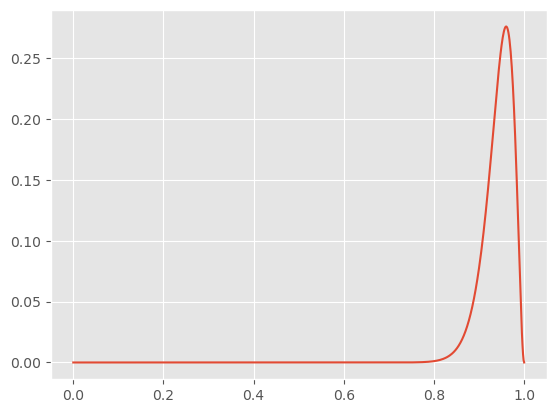

In [25]:
'''
Since we already understand the distribution of our data,
we can maximize the likelihood function P(D|θ).

This would just be maximizing the probability of our data by 
multiplying the probability of each point, and then we would simply
backprop through the log likelihood.
'''

# we'll just cheat and look at the likelihood
# assigned by our handy function!
import scipy.stats


# calculates the probability mass for a variety of
# p,n, and k values (p=thetas)
def calc_binom_likelihood(thetas,n,k):
    pk = scipy.stats.binom(n,thetas).pmf(k)
    return pk
    
thetas = np.linspace(0,1,800)
l = calc_binom_likelihood(thetas,50,48)

# plotting our function!
plt.plot(thetas,l)
plt.show()

If this function was not one-dimensional and so simple, we would have to turn to other methods for maximizing the likelyhood

2. ***Using a prior***

Now we will select a prior, and approximate our data.
Priors can help us incorporate *prior* knowledge about something
to acheive more accurate posterior probability distributions for our parameters, however we are going to be using a uniform distribution.

Since the beta distribution is a *conjugate*  prior for binomial distributions, we will be using this to parameterize theta.

Here is the formula for our beta distribution:


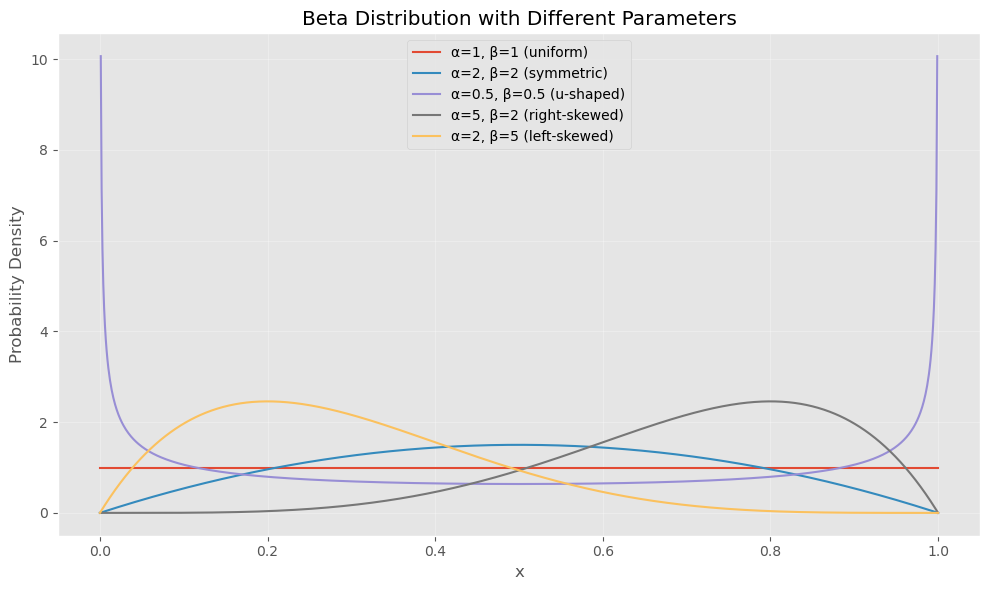

In [27]:
# coding beta distribution examples
# parameterized by: alpha, theta
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# Create figure and axis
plt.figure(figsize=(10, 6))

# Generate x values
x = np.linspace(0, 1, 1000)

# Plot several Beta distributions with different parameters
params = [
    (1, 1, 'uniform'),
    (2, 2, 'symmetric'),
    (0.5, 0.5, 'u-shaped'), # sqrt
    (5, 2, 'right-skewed'),
    (2, 5, 'left-skewed')
]

for alpha, beta, label in params:
    # Calculate Beta distribution
    y = stats.beta.pdf(x, alpha, beta)
    plt.plot(x, y, label=f'α={alpha}, β={beta} ({label})')

# Customize the plot
plt.title('Beta Distribution with Different Parameters')
plt.xlabel('x')
plt.ylabel('Probability Density')
plt.legend()
plt.grid(True, alpha=0.3)

# Show the plot
plt.tight_layout()
plt.show()

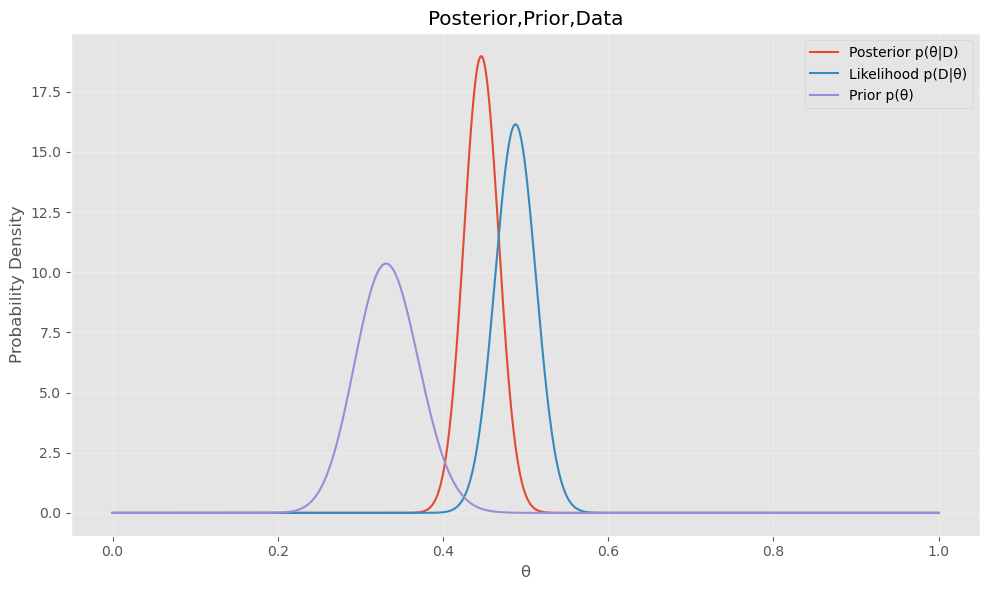

In [40]:
# defining a simple prior and updating our beleifs
prior = [50,100] # more likely to not break
data = [200,210] # our n and k values
# *these are not our actual priors, i was just playing around*


def get_posterior(prior,data): # getting posterior for beta given data
    
    x = np.linspace(0, 1, 1000) # for our plot
    y_final = stats.beta.pdf(x, prior[0]+data[0], prior[1]+data[1])
    prior = stats.beta.pdf(x, prior[0], prior[1])
    data = stats.beta.pdf(x,data[0], data[1])
    
    plt.figure(figsize=(10, 6))
    plt.plot(x,y_final,label="Posterior p(θ|D)")
    plt.plot(x,data,label="Likelihood p(D|θ)")
    plt.plot(x,prior,label="Prior p(θ)")
    
    # plotting
    plt.title('Posterior,Prior,Data')
    plt.xlabel('θ')
    plt.ylabel('Probability Density')
    plt.legend()
    plt.grid(True, alpha=0.3)

    # Show the plot
    plt.tight_layout()
    plt.show()
    
get_posterior(prior,data)

now we can get the probability for a future sample by just integrating the area under the curve for our posterior!
integrate(θP(θ|D)dθ)

## Example 2: Bayesian inference with normal distribution

Now we will look at a more common example where we are trying to estimate the mean and standard deviation for data that we beleive to be normally distributed. 

We will be looking at heights in a population, and trying the infer the underlying distribution (and assuming it is normal).

> Note that for normal distributions, we can fix the mean or variance and parameterize them with normal distributions for an easy time with the priors. However, when we want to find both, this is more difficult:

1. Posterior for fixed σ, uncertain μ

![μ](mupost.png)

2. Posterior for uncertain σ, fixed μ

![sigma](sigmapost.png)

this is an inverse gamma distribution

3. If both are unknown, their posteriors will be:
***complex*** 
Here is how we'll approach the problem:

1. We will parameterize p(μ) and p(σ) with appropriate distributions that will be conjugate under the conditions that both are unknown (defining our priors)
2. We will pick suitable values for the parameters of our priors
3. Since we were careful about conjugate priors, we will compute the closed-form solution:


In [ ]:
# dummy dataset observed
height_observed = np.random.normal(100,10)

# our parameterization of mew and sigma
mew = [2,2]
sigma = [2,2]

### update our parameters based on data given,
### some long complex calculation

### plot our data's likelihood, our priors,
### and our posteriors

***What if we didn't have a closed-form solution?***

Now, if we didn't have a closed form solution, we would need to generate samples from our prior distribution, and see how well they replicate our data p(x|params), and then we normalize by p(x).

> We would literally be counting the number of times our data was reproduced for each approximate parameter 'bin', and normalizing by the overall number of times x was produced.

We will be sampling from a joint distribution of our priors (which we can just make gaussian), and in order to do this efficiently, we will be using the monte-carlo markov chain sampling method.



## Example 3: Bayesian linear regression

Lets define our problem:
1. We have some weights B, and some variables X that are known.
2. We have a dataset containing X and Y values.
3. We want to build a model to estimate a distribution for our weights.

We can formulate the problem in this way: each *y* value is draw from a normal distribution parameterized as follows:
![Bayesian_reg](bayesianreg.png)

we are saying that each y value is drawn from some distribution which has a mean proportional to X times the weights *B* and the standard deviation times the identity matrix (a fixed value we define). This way, we are also able to extend our weights to n-dimensions, with different variables x_1 to x_n.

Then, we attempt to calculate the posterior p(B|y,X) for our parameters!

To do this, lets look at what we need to optimize:
- We want to optimize p(*B*|y) to find the best beta value for our posterior
- We cannot simply calculated the posterior (intractible for high-dimensional X values)
- We can maximize the log likelihood of our prior, which is proportional to:

        argmax_B (log(p(theta))+log(p(y|theta)))

> remember that maximizing the log likelihood is the same as maximizing the likelihood

This is great, because we don't even need to calculate the denominator.

 - The likelihood, p(y|B) is the iterative multiplication of the normal likelihood for some parameters. Since we took to log, it is adding these parameters.

 #### ***Defining our prior***
 Now, we can build our priors for each B_n. We assume they are i.i.d. (independent and indentically distributed), and therefore assign them all normal distributions with mean 0, and varying std dev. This inherently bakes in an l1 norm, and forces our values to stay around mean 0.

 > choosing priors with mean zero is important: it forces each prior to have weights centered around zero

 > "it would take extreme evidence for us to move our priors away from zero"
 > We will see this as we derive our posteriors formula